<a href="https://colab.research.google.com/github/7Horizon/DIFA-TI/blob/main/DIFA_Technical_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#git clone https://github.com/7Horizon/DIFA-TI.git

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [40]:
# Liste der Tickersymbole der ETFs, die die großen europäischen Indizes abbilden
etfs = {
    "Euro Stoxx 50 ETF": "EXW1.DE",
    "FTSE 100 ETF": "ISF.L",
    "DAX ETF": "EXS1.DE",
    "CAC 40 ETF": "CAC.PA",
    "AEX ETF": "IAEX.AS",
    "IBEX 35 ETF": "EWP",
    "SMI ETF": "CSSMI.SW"
}

# Zeitperiode (letzte 10 Jahre)
start_date = "2013-09-30"
end_date = "2023-09-30"

# Hier werden die spezifischen Datenkategorien ausgewählt, in diesem Falle der Schlusskurs
data_categories = ['Adj Close']

# Daten abrufen und spezifische Kategorien auswählen
data = {}
for name, ticker in etfs.items():
    index_data = yf.download(ticker, start=start_date, end=end_date)
    data[name] = index_data[data_categories]

# Die abgerufenen Daten in ein DataFrame packen
index_data_etfs = pd.DataFrame({name: data[name]['Adj Close'] for name in etfs})

# Leere Daten im Frame auffüllen
index_data_etfs_int = index_data_etfs.interpolate();

# Performance der ETFs berechnen (prozentuale Veränderung über 10 Jahre)
performance = (index_data_etfs.iloc[-1] / index_data_etfs.iloc[0] - 1) * 100
print("Performance der ETFs über 10 Jahre:")
print(performance)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Performance der ETFs über 10 Jahre:
Euro Stoxx 50 ETF     96.440338
FTSE 100 ETF          15.571530
DAX ETF               72.037078
CAC 40 ETF           129.203896
AEX ETF              146.886285
IBEX 35 ETF           10.986614
SMI ETF               79.643706
dtype: float64


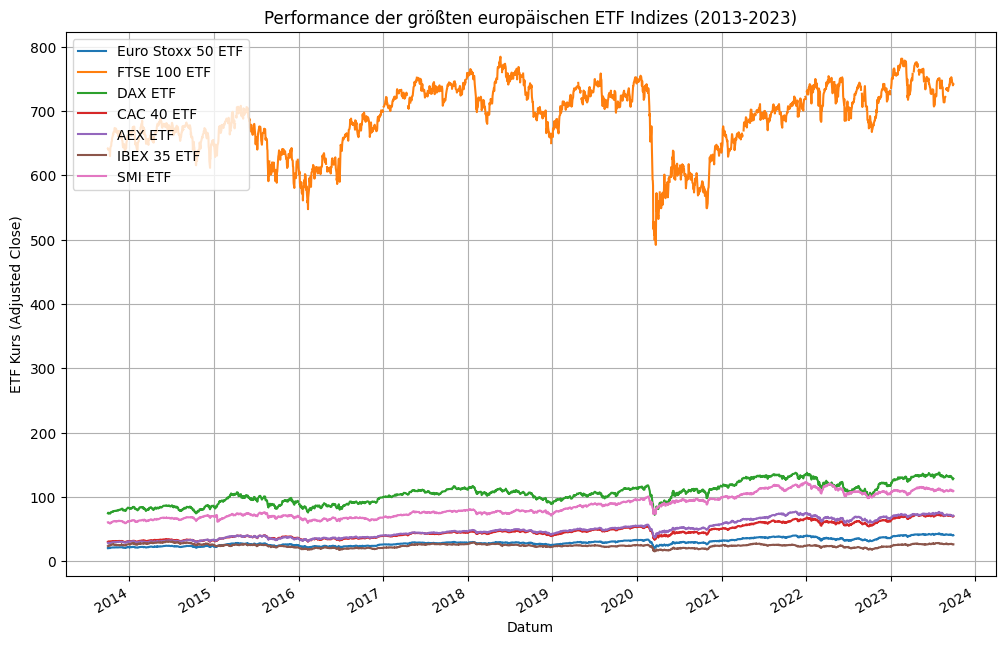

In [41]:
# Plot der ETF-Performance über die letzten 10 Jahre
index_data_etfs.plot(figsize=(12, 8), title='Performance der größten europäischen ETF Indizes (2013-2023)')
plt.xlabel("Datum")
plt.ylabel("ETF Kurs (Adjusted Close)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [42]:
# Schleife durch alle ETFs und zeige die ersten 5 Zeilen für jeden ETF an
for name in etfs:
    print(f"\n{name} - Erste 5 Zeilen:")
    print(index_data_etfs[name].head())


Euro Stoxx 50 ETF - Erste 5 Zeilen:
Date
2013-09-30    20.723703
2013-10-01    20.998257
2013-10-02    20.887730
2013-10-03          NaN
2013-10-04    20.951908
Name: Euro Stoxx 50 ETF, dtype: float64

FTSE 100 ETF - Erste 5 Zeilen:
Date
2013-09-30    641.951111
2013-10-01    641.752014
2013-10-02    639.461792
2013-10-03    640.158752
2013-10-04    640.358093
Name: FTSE 100 ETF, dtype: float64

DAX ETF - Erste 5 Zeilen:
Date
2013-09-30    74.879211
2013-10-01    75.714119
2013-10-02    75.170464
2013-10-03          NaN
2013-10-04    75.131622
Name: DAX ETF, dtype: float64

CAC 40 ETF - Erste 5 Zeilen:
Date
2013-09-30    30.596870
2013-10-01    30.963459
2013-10-02    30.696848
2013-10-03    30.478373
2013-10-04    30.741285
Name: CAC 40 ETF, dtype: float64

AEX ETF - Erste 5 Zeilen:
Date
2013-09-30    28.802710
2013-10-01    29.017365
2013-10-02    28.894690
2013-10-03    28.791203
2013-10-04    28.883196
Name: AEX ETF, dtype: float64

IBEX 35 ETF - Erste 5 Zeilen:
Date
2013-09-30   

# Simple Moving Averages

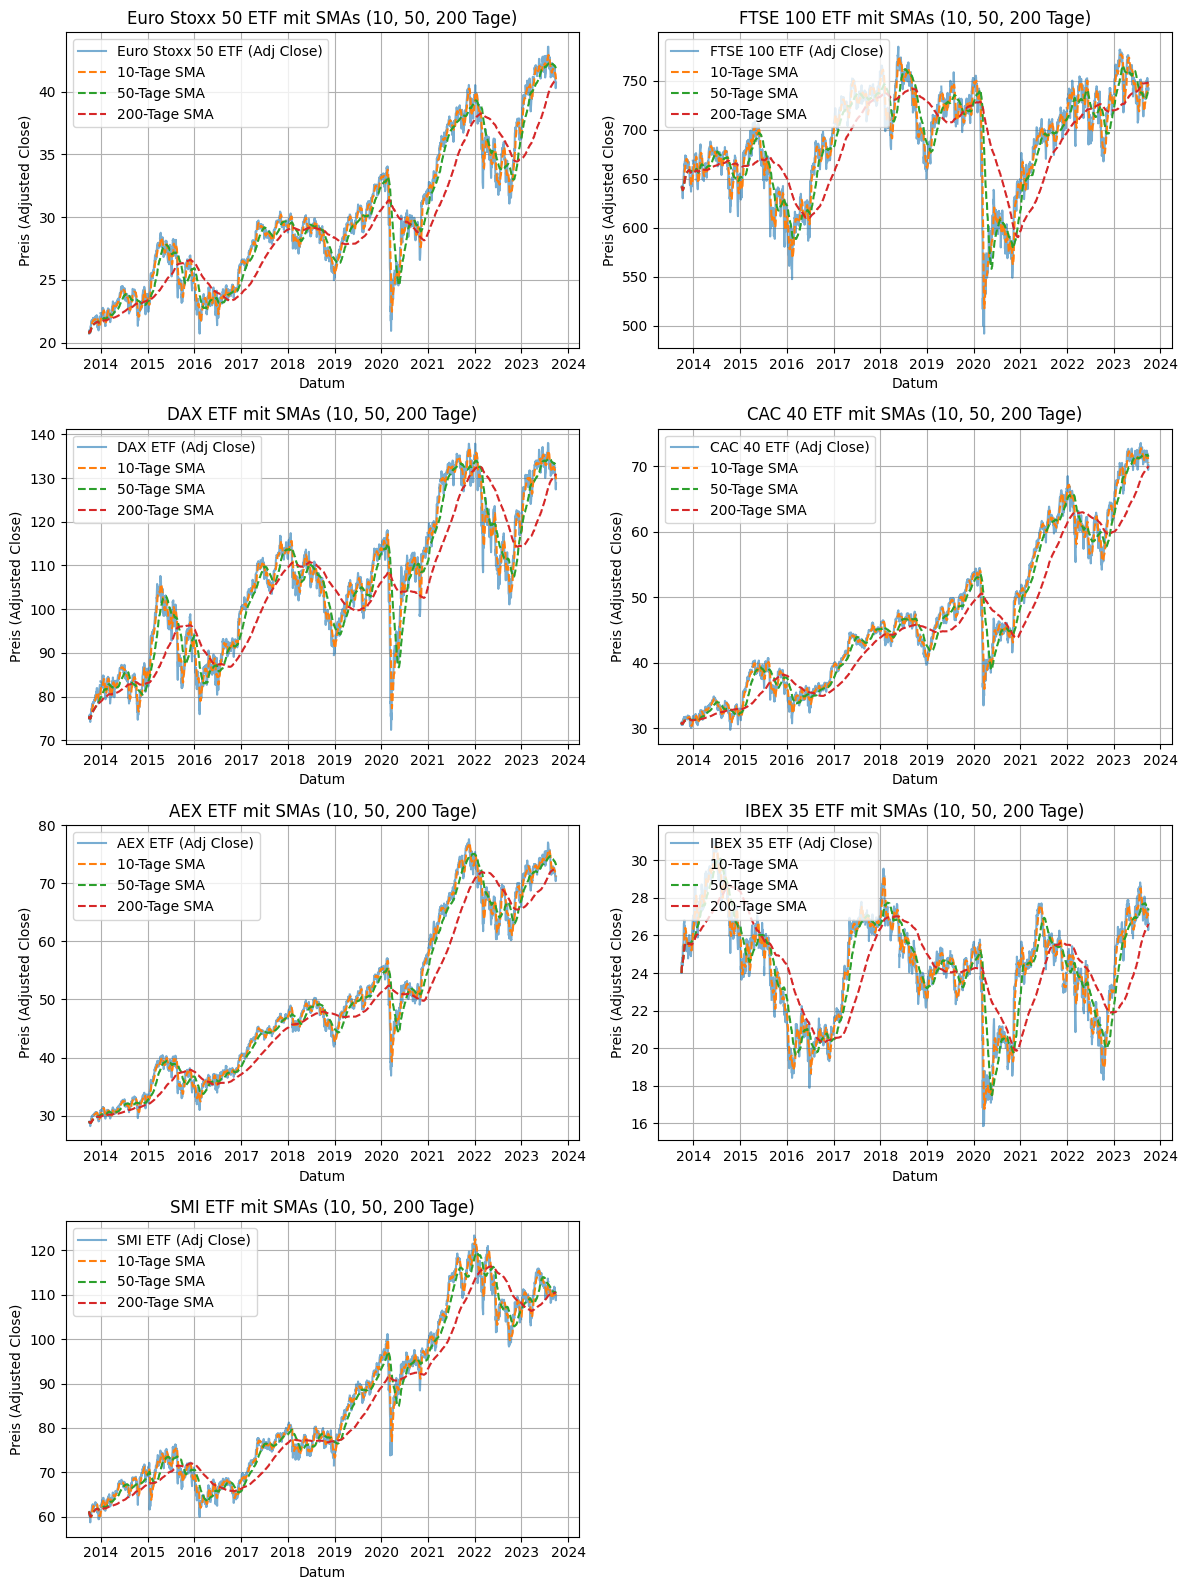

In [43]:
# Berechnung der Simple Moving Averages für 10, 50 und 200 Tage
sma_10 = index_data_etfs.rolling(window=10, min_periods=1).mean()
sma_50 = index_data_etfs.rolling(window=50, min_periods=1).mean()
sma_200 = index_data_etfs.rolling(window=200, min_periods=1).mean()

# Anzahl der ETFs und die Aufteilung auf zwei Reihen berechnen
num_etfs = len(etfs)
rows = math.ceil(num_etfs / 2)
cols = 2

# Subplots erstellen
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

# Falls es eine ungerade Anzahl an ETFs gibt, kann eine leere Achse erscheinen. Diese verstecken wir dann später.
axes = axes.flatten()

# Plots in den Subplots erzeugen
for idx, name in enumerate(etfs):
    axes[idx].plot(index_data_etfs[name], label=f"{name} (Adj Close)", alpha=0.6)
    axes[idx].plot(sma_10[name], label="10-Tage SMA", linestyle='--')
    axes[idx].plot(sma_50[name], label="50-Tage SMA", linestyle='--')
    axes[idx].plot(sma_200[name], label="200-Tage SMA", linestyle='--')
    axes[idx].set_title(f"{name} mit SMAs (10, 50, 200 Tage)")
    axes[idx].set_xlabel("Datum")
    axes[idx].set_ylabel("Preis (Adjusted Close)")
    axes[idx].legend(loc="upper left")
    axes[idx].grid(True)

# Falls es leere Subplots gibt, diese verstecken
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Zusammenfassen der SMAs in einem DataFrame für den Export
sma_table = pd.concat([index_data_etfs, sma_10, sma_50, sma_200], axis=1,
                      keys=['Adjusted Close', 'SMA_10', 'SMA_50', 'SMA_200'])

# Linear Weighted Moving Average

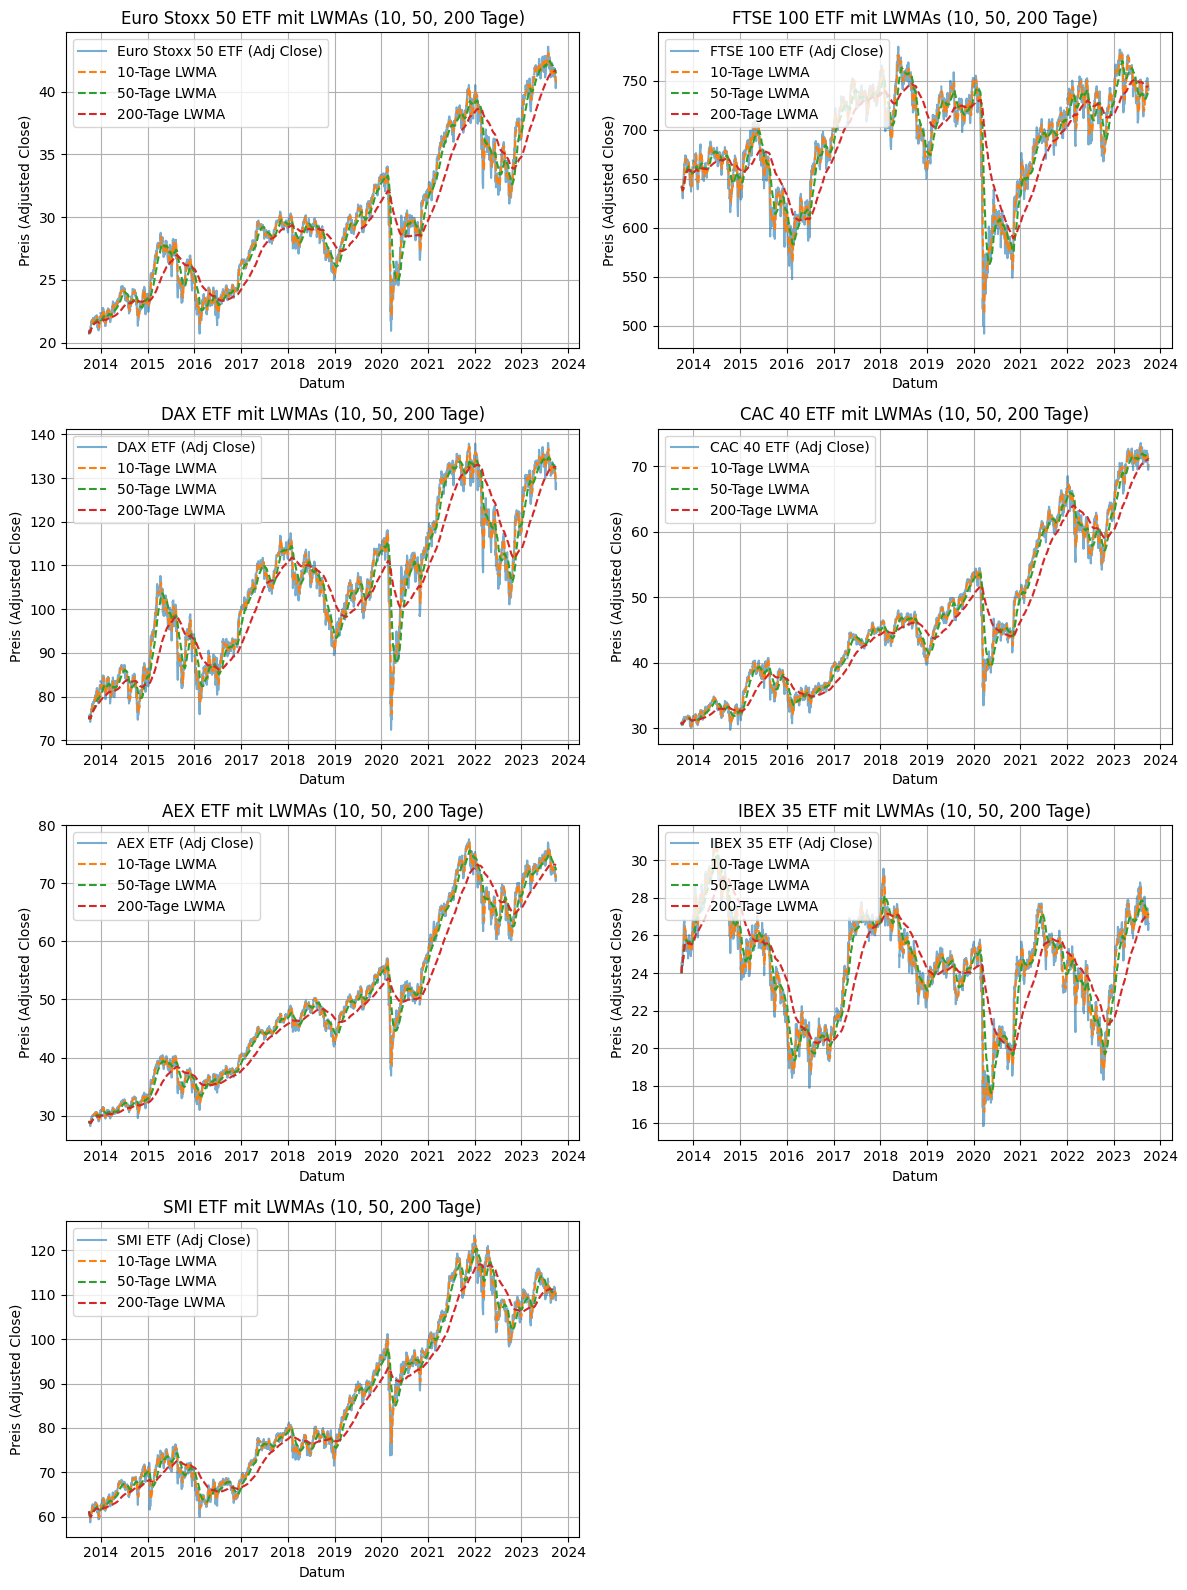

In [44]:
def lwma(data, window_size):
    """
    Berechnet den Linear Weighted Moving Average (LWMA) für eine gegebene Datenreihe und Fenstergröße.

    :param data: Pandas Series oder Liste
    :param window_size: Die Größe des Fensters für die Berechnung des LWMA
    :return: Pandas Series mit den LWMA-Werten
    """
    weights = np.arange(1, window_size + 1)
    lwma = data.rolling(window=window_size, min_periods=1).apply(
        lambda prices: np.dot(prices, weights[-len(prices):]) / weights[-len(prices):].sum(),
        raw=True
    )
    return lwma

# Berechnung der Linear Weighted Moving Averages für 10, 50 und 200 Tage
lwma_10 = lwma(index_data_etfs_int, 10)
lwma_50 = lwma(index_data_etfs_int, 50)
lwma_200 = lwma(index_data_etfs_int, 200)

# Anzahl der ETFs und die Aufteilung auf zwei Reihen berechnen
num_etfs = len(etfs)
rows = math.ceil(num_etfs / 2)
cols = 2

# Subplots erstellen
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

# Falls es eine ungerade Anzahl an ETFs gibt, kann eine leere Achse erscheinen. Diese verstecken wir dann später.
axes = axes.flatten()

# Plots in den Subplots erzeugen
for idx, name in enumerate(etfs):
    axes[idx].plot(index_data_etfs[name], label=f"{name} (Adj Close)", alpha=0.6)
    axes[idx].plot(lwma_10[name], label="10-Tage LWMA", linestyle='--')
    axes[idx].plot(lwma_50[name], label="50-Tage LWMA", linestyle='--')
    axes[idx].plot(lwma_200[name], label="200-Tage LWMA", linestyle='--')
    axes[idx].set_title(f"{name} mit LWMAs (10, 50, 200 Tage)")
    axes[idx].set_xlabel("Datum")
    axes[idx].set_ylabel("Preis (Adjusted Close)")
    axes[idx].legend(loc="upper left")
    axes[idx].grid(True)

# Falls es leere Subplots gibt, diese verstecken
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Zusammenfassen der LWMAs in einem DataFrame
lwma_table = pd.concat([lwma_10, lwma_50, lwma_200], axis=1, keys=['LWMA_10', 'LWMA_50', 'LWMA_200'])

# Exponential Weighted Moving Averaged

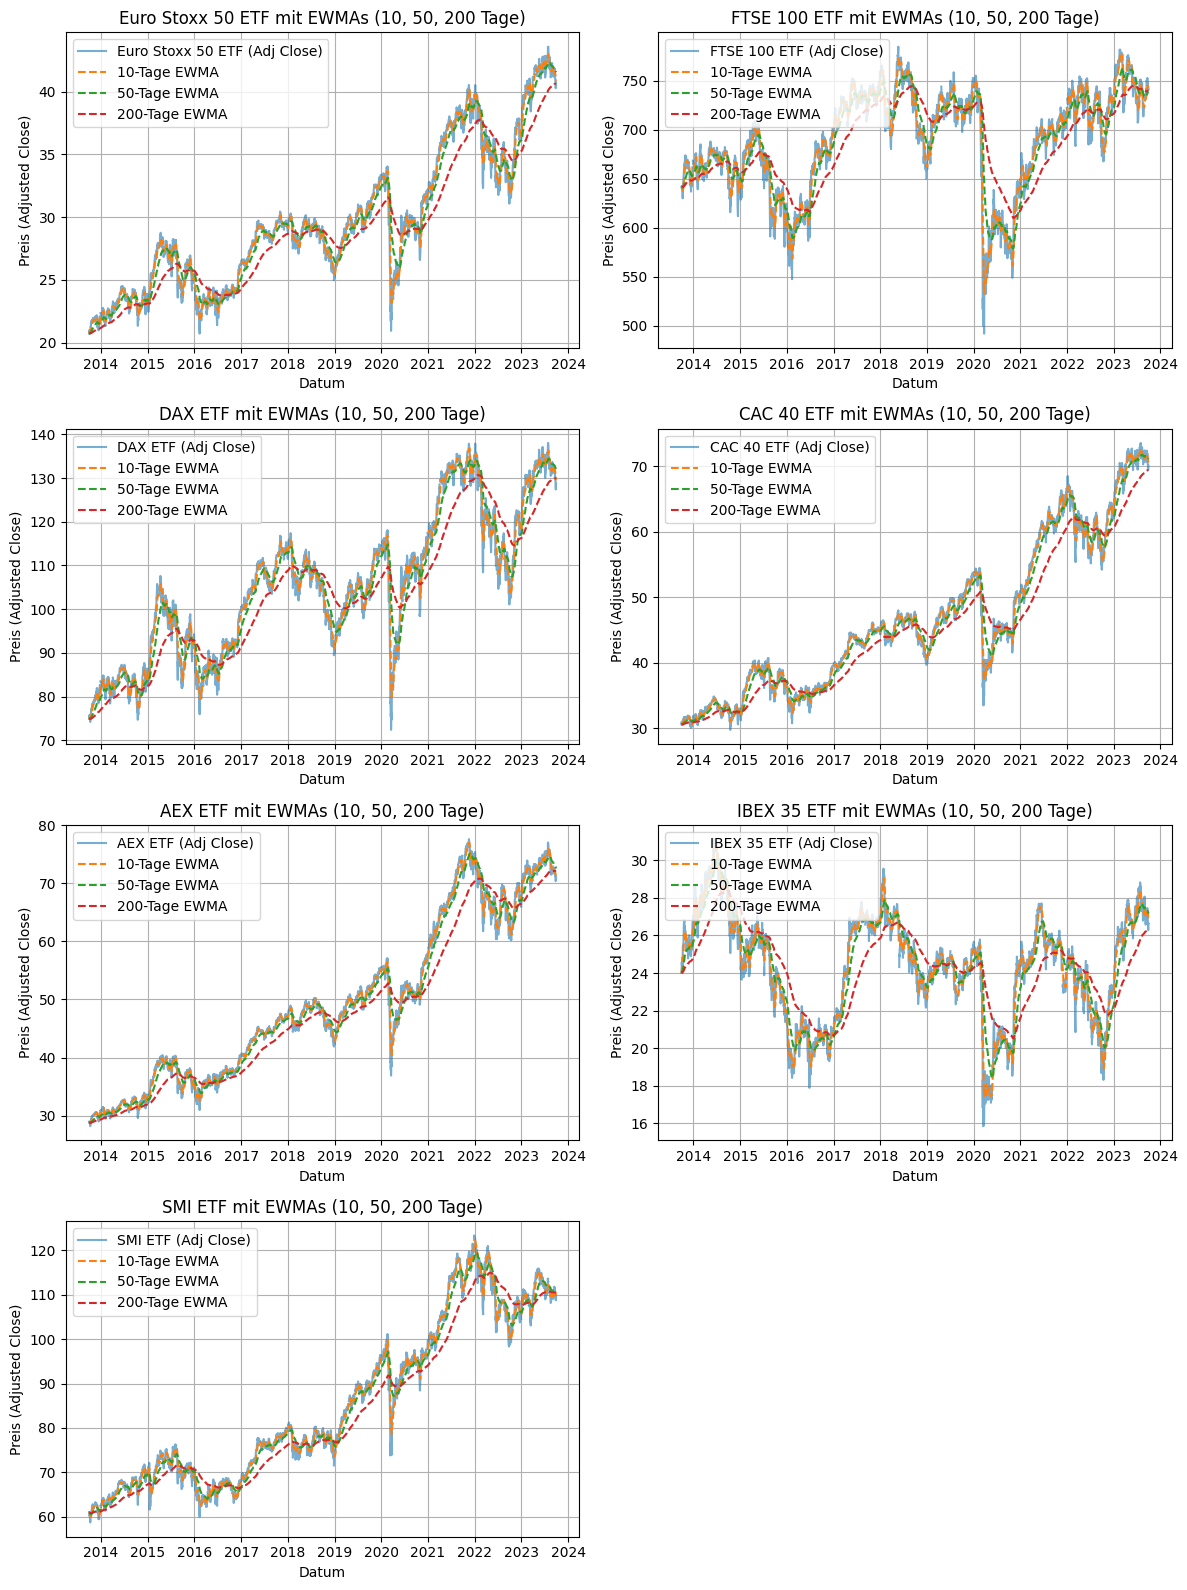

In [45]:
# Berechnung der Exponential Weighted Moving Averages für 10, 50 und 200 Tage
ewma_10 = index_data_etfs_int.ewm(span=10, adjust=False).mean()
ewma_50 = index_data_etfs_int.ewm(span=50, adjust=False).mean()
ewma_200 = index_data_etfs_int.ewm(span=200, adjust=False).mean()

# Anzahl der ETFs und die Aufteilung auf zwei Reihen berechnen
num_etfs = len(etfs)
rows = math.ceil(num_etfs / 2)
cols = 2

# Subplots erstellen
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

# Falls es eine ungerade Anzahl an ETFs gibt, kann eine leere Achse erscheinen. Diese verstecken wir dann später.
axes = axes.flatten()

# Plots in den Subplots erzeugen
for idx, name in enumerate(etfs):
    axes[idx].plot(index_data_etfs[name], label=f"{name} (Adj Close)", alpha=0.6)
    axes[idx].plot(ewma_10[name], label="10-Tage EWMA", linestyle='--')
    axes[idx].plot(ewma_50[name], label="50-Tage EWMA", linestyle='--')
    axes[idx].plot(ewma_200[name], label="200-Tage EWMA", linestyle='--')
    axes[idx].set_title(f"{name} mit EWMAs (10, 50, 200 Tage)")
    axes[idx].set_xlabel("Datum")
    axes[idx].set_ylabel("Preis (Adjusted Close)")
    axes[idx].legend(loc="upper left")
    axes[idx].grid(True)

# Falls es leere Subplots gibt, diese verstecken
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Zusammenfassen der EWMAs in einem DataFrame
ewma_table = pd.concat([ewma_10, ewma_50, ewma_200], axis=1, keys=['EWMA_10', 'EWMA_50', 'EWMA_200'])

# Moving Average Crossover

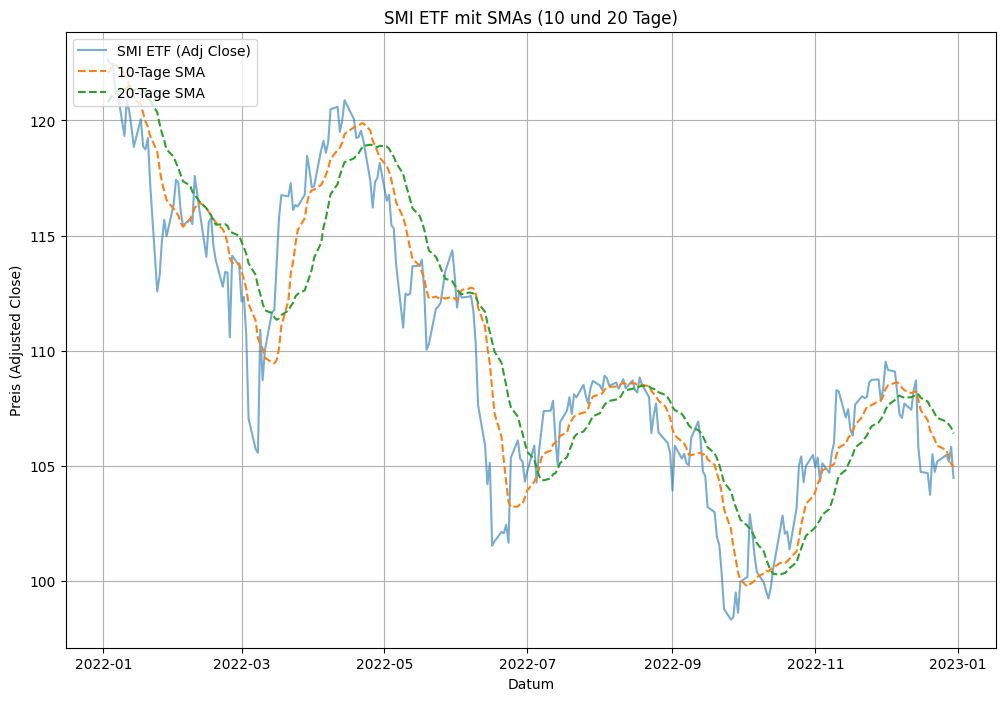

In [53]:
# Berechnung der Simple Moving Averages für 10 und 20 Tage
sma_10 = index_data_etfs_int["SMI ETF"].rolling(window=10, min_periods=1).mean()
sma_20 = index_data_etfs_int["SMI ETF"].rolling(window=20, min_periods=1).mean()

# Beispiel: Zeitraum definieren
start_date = '2022-01-01'
end_date = '2023-01-01'

plt.figure(figsize=(12, 8))
plt.plot(index_data_etfs_int["SMI ETF"].loc[start_date:end_date], label="SMI ETF (Adj Close)", alpha=0.6)
plt.plot(sma_10.loc[start_date:end_date], label="10-Tage SMA", linestyle='--')
plt.plot(sma_20.loc[start_date:end_date], label="20-Tage SMA", linestyle='--')
plt.title("SMI ETF mit SMAs (10 und 20 Tage)")
plt.xlabel("Datum")
plt.ylabel("Preis (Adjusted Close)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()
